In [1]:
import pandas as pd
import pandas_profiling as pdpro

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [3]:
filterwarnings("ignore")

In [4]:
df = pd.read_csv("heart.csv")

In [5]:
pdpro.ProfileReport(df)

In [6]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [10]:
df.corr()

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
output   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trtbps   -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalachh  0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exng     -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slp       0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
caa      -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thall    -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
output    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

             thall    output  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trtbps    0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalachh -0.096439  0.421741  
exng      0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slp      -0.104764  0.345877  
caa       0.151832 -0.391724  
thall     1.000000 -0.344029  
output   -0.344029  1.000000

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [13]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [14]:
df.trtbps.value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trtbps, dtype: int64

In [15]:
print(df.groupby(["sex","output"])["trtbps"].mean())

sex  output
0    0         146.125000
     1         128.736111
1    0         131.929825
     1         129.741935
Name: trtbps, dtype: float64


In [16]:
print(df.groupby(["sex","output"])["trtbps"].mean())

sex  output
0    0         146.125000
     1         128.736111
1    0         131.929825
     1         129.741935
Name: trtbps, dtype: float64


In [17]:
print(df.groupby(["sex","output"])["thalachh"].mean())

sex  output
0    0         142.416667
     1         154.027778
1    0         138.403509
     1         161.903226
Name: thalachh, dtype: float64


In [18]:
print(df.groupby(["sex","output"])["oldpeak"].mean())

sex  output
0    0         1.841667
     1         0.554167
1    0         1.531579
     1         0.605376
Name: oldpeak, dtype: float64


In [19]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [20]:
corrPearson = df.corr(method="pearson")

In [21]:
corrPearson

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
output   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trtbps   -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalachh  0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exng     -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slp       0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
caa      -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thall    -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
output    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

             thall    output  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trtbps    0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalachh -0.096439  0.421741  
exng      0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slp      -0.104764  0.345877  
caa       0.151832 -0.391724  
thall     1.000000 -0.344029  
output   -0.344029  1.000000

In [22]:
corrSpearman = df.corr(method="spearman")

In [23]:
corrSpearman

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.099131 -0.087494  0.285617  0.195786  0.113978   
sex      -0.099131  1.000000 -0.062041 -0.052941 -0.151342  0.045032   
cp       -0.087494 -0.062041  1.000000  0.035413 -0.091721  0.089775   
trtbps    0.285617 -0.052941  0.035413  1.000000  0.126562  0.151984   
chol      0.195786 -0.151342 -0.091721  0.126562  1.000000  0.018463   
fbs       0.113978  0.045032  0.089775  0.151984  0.018463  1.000000   
restecg  -0.132769 -0.048389  0.065640 -0.125841 -0.161933 -0.081508   
thalachh -0.398052 -0.039868  0.324013 -0.040407 -0.046766 -0.014273   
exng      0.089679  0.141664 -0.418256  0.052918  0.091514  0.025665   
oldpeak   0.268291  0.100715 -0.161449  0.154267  0.045260  0.028363   
slp      -0.184048 -0.025010  0.159478 -0.086570 -0.012551 -0.045786   
caa       0.340955  0.119368 -0.216006  0.090140  0.111981  0.134513   
thall     0.087254  0.250821 -0.207840  0.059673  0.083628 -0.006737   
output   -0.238400 -0.280937  0.460860 -0.121593 -0.120888 -0.028046   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.132769 -0.398052  0.089679  0.268291 -0.184048  0.340955   
sex      -0.048389 -0.039868  0.141664  0.100715 -0.025010  0.119368   
cp        0.065640  0.324013 -0.418256 -0.161449  0.159478 -0.216006   
trtbps   -0.125841 -0.040407  0.052918  0.154267 -0.086570  0.090140   
chol     -0.161933 -0.046766  0.091514  0.045260 -0.012551  0.111981   
fbs      -0.081508 -0.014273  0.025665  0.028363 -0.045786  0.134513   
restecg   1.000000  0.087863 -0.077399 -0.077372  0.113661 -0.097862   
thalachh  0.087863  1.000000 -0.400860 -0.433241  0.436968 -0.257347   
exng     -0.077399 -0.400860  1.000000  0.297173 -0.274475  0.162025   
oldpeak  -0.077372 -0.433241  0.297173  1.000000 -0.594847  0.224895   
slp       0.113661  0.436968 -0.274475 -0.594847  1.000000 -0.099901   
caa      -0.097862 -0.257347  0.162025  0.224895 -0.099901  1.000000   
thall    -0.010982 -0.160581  0.247113  0.255026 -0.154886  0.189103   
output    0.148612  0.428370 -0.436757 -0.421487  0.371460 -0.457607   

             thall    output  
age       0.087254 -0.238400  
sex       0.250821 -0.280937  
cp       -0.207840  0.460860  
trtbps    0.059673 -0.121593  
chol      0.083628 -0.120888  
fbs      -0.006737 -0.028046  
restecg  -0.010982  0.148612  
thalachh -0.160581  0.428370  
exng      0.247113 -0.436757  
oldpeak   0.255026 -0.421487  
slp      -0.154886  0.371460  
caa       0.189103 -0.457607  
thall     1.000000 -0.403299  
output   -0.403299  1.000000

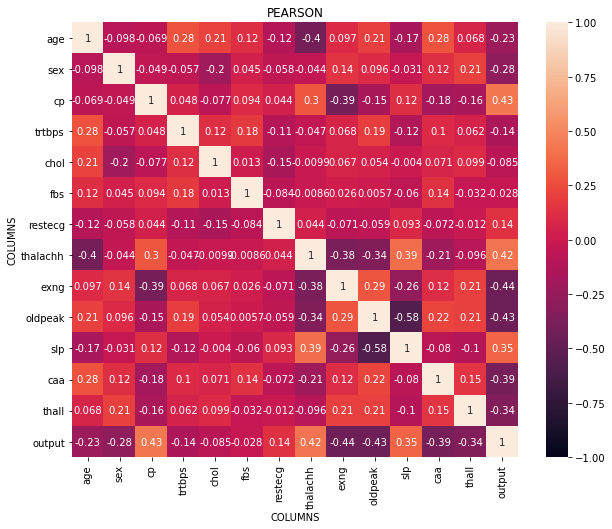

In [24]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True, vmin=-1, vmax=+1)
plt.title("PEARSON")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

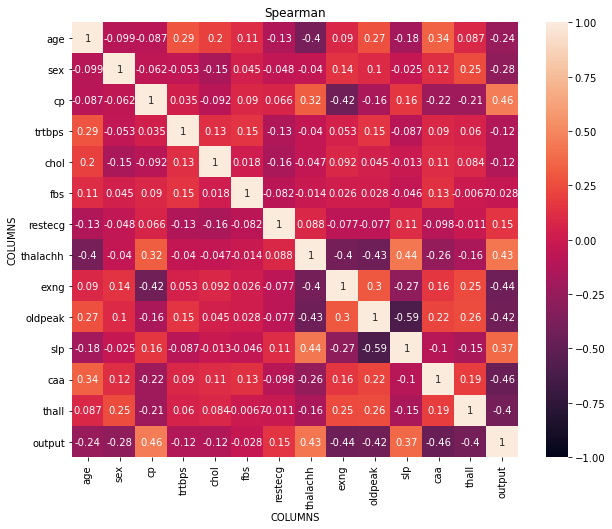

In [25]:
figure = plt.figure(figsize=(10,8))
sns.heatmap(corrSpearman,annot=True, vmin=-1, vmax=+1)
plt.title("Spearman")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

In [26]:
for i in df.columns:
    print(i)
    
type(i)

age
sex
cp
trtbps
chol
fbs
restecg
thalachh
exng
oldpeak
slp
caa
thall
output


str

# NORMALITY

In [27]:
for i in df.columns:
    print(i)
    print(shapiro(df[i]))

age
ShapiroResult(statistic=0.9863715767860413, pvalue=0.005801409482955933)
sex
ShapiroResult(statistic=0.5857275724411011, pvalue=2.750285276260118e-26)
cp
ShapiroResult(statistic=0.7901582717895508, pvalue=1.857025903554317e-19)
trtbps
ShapiroResult(statistic=0.965917706489563, pvalue=1.4580031120203785e-06)
chol
ShapiroResult(statistic=0.9468814134597778, pvalue=5.364669153351542e-09)
fbs
ShapiroResult(statistic=0.4239872097969055, pvalue=5.430913299217107e-30)
restecg
ShapiroResult(statistic=0.6793191432952881, pvalue=1.378427146790608e-23)
thalachh
ShapiroResult(statistic=0.9763151407241821, pvalue=6.620329077122733e-05)
exng
ShapiroResult(statistic=0.5912637710571289, pvalue=3.8468651050195e-26)
oldpeak
ShapiroResult(statistic=0.8441833853721619, pvalue=8.18340235561653e-17)
slp
ShapiroResult(statistic=0.7446511387825012, pvalue=2.5741521389352104e-21)
caa
ShapiroResult(statistic=0.7281151413917542, pvalue=6.270960025237855e-22)
thall
ShapiroResult(statistic=0.7505781054496765, 

In [28]:
print(shapiro(df.caa))

ShapiroResult(statistic=0.7281151413917542, pvalue=6.270960025237855e-22)


# HOMOGENEITY

In [29]:
print(levene(df["caa"],df["thall"],df["age"],df["age"],center='median',proportiontocut=0.5))

LeveneResult(statistic=334.37452974935246, pvalue=4.9455072035884886e-158)


# VISUALIZATION

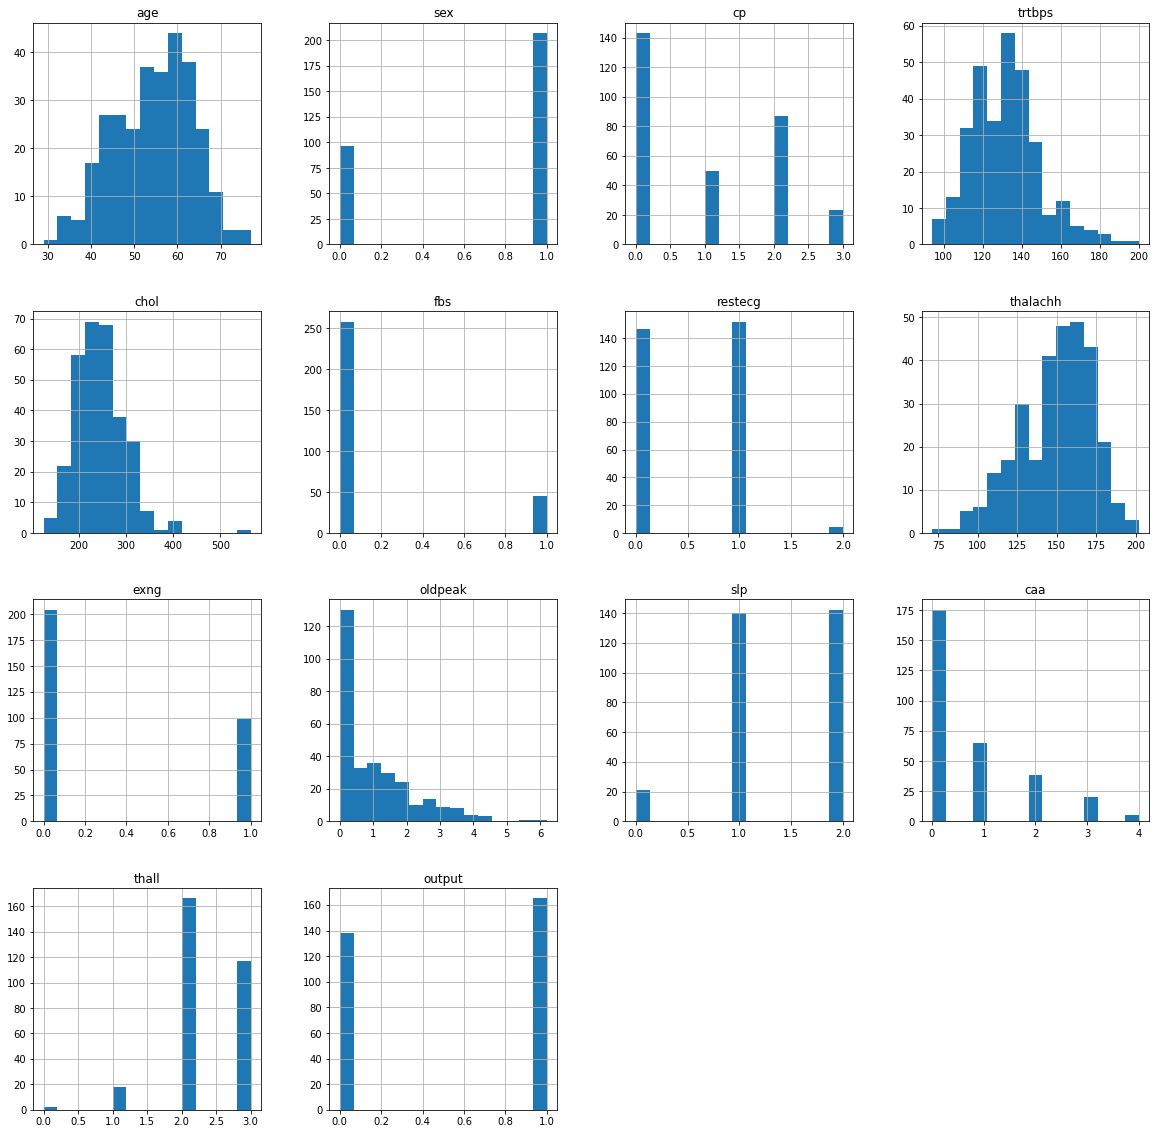

In [98]:
df.hist(figsize=(20,20),grid = True,sharex=False,bins=15)
plt.show()

In [31]:
dataV = df.copy()

In [32]:
dataV

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[303 rows x 14 columns]

In [33]:
dataV["sex"] = pd.Categorical(dataV["sex"])
dataV["cp"] = pd.Categorical(dataV["cp"])
dataV["fbs"] = pd.Categorical(dataV["fbs"])
dataV["restecg"] = pd.Categorical(dataV["restecg"])
dataV["exng"] = pd.Categorical(dataV["exng"])
dataV["slp"] = pd.Categorical(dataV["slp"])
dataV["caa"] = pd.Categorical(dataV["caa"])
dataV["thall"] = pd.Categorical(dataV["thall"])
dataV["output"] = pd.Categorical(dataV["output"])

In [34]:
dataV

age sex cp  trtbps  chol fbs restecg  thalachh exng  oldpeak slp caa  \
0     63   1  3     145   233   1       0       150    0      2.3   0   0   
1     37   1  2     130   250   0       1       187    0      3.5   0   0   
2     41   0  1     130   204   0       0       172    0      1.4   2   0   
3     56   1  1     120   236   0       1       178    0      0.8   2   0   
4     57   0  0     120   354   0       1       163    1      0.6   2   0   
..   ...  .. ..     ...   ...  ..     ...       ...  ...      ...  ..  ..   
298   57   0  0     140   241   0       1       123    1      0.2   1   0   
299   45   1  3     110   264   0       1       132    0      1.2   1   0   
300   68   1  0     144   193   1       1       141    0      3.4   1   2   
301   57   1  0     130   131   0       1       115    1      1.2   1   1   
302   57   0  1     130   236   0       0       174    0      0.0   1   1   

    thall output  
0       1      1  
1       2      1  
2       2      1  
3       2      1  
4       2      1  
..    ...    ...  
298     3      0  
299     3      0  
300     3      0  
301     3      0  
302     2      0  

[303 rows x 14 columns]

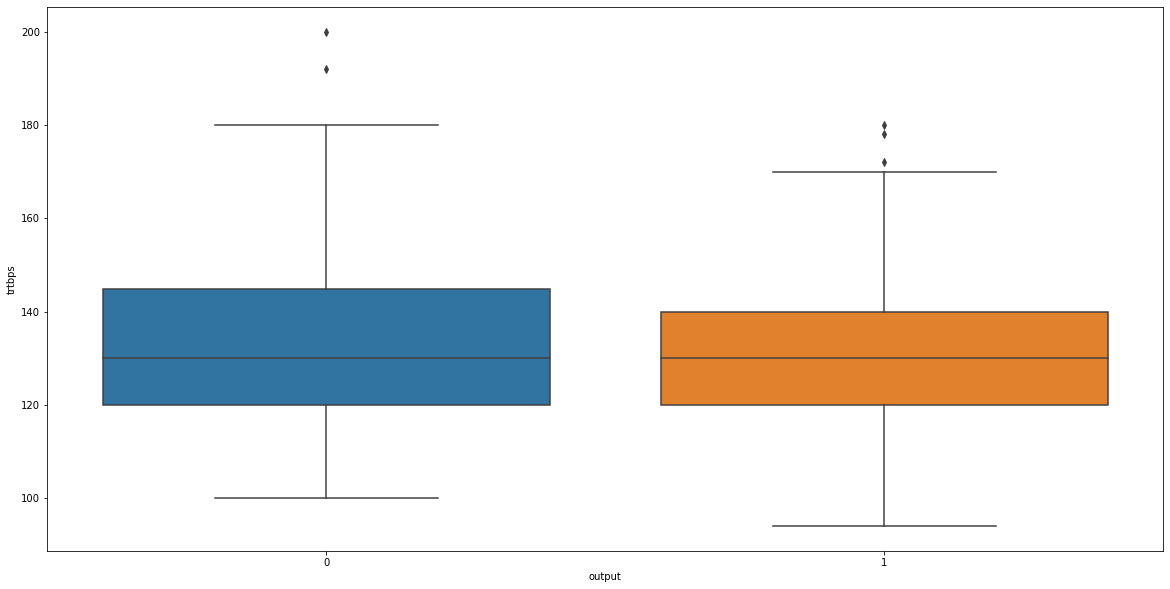

In [35]:
figure = plt.figure(figsize=(20,10))
sns.boxplot(y="trtbps",x="output",data=df)
plt.show()

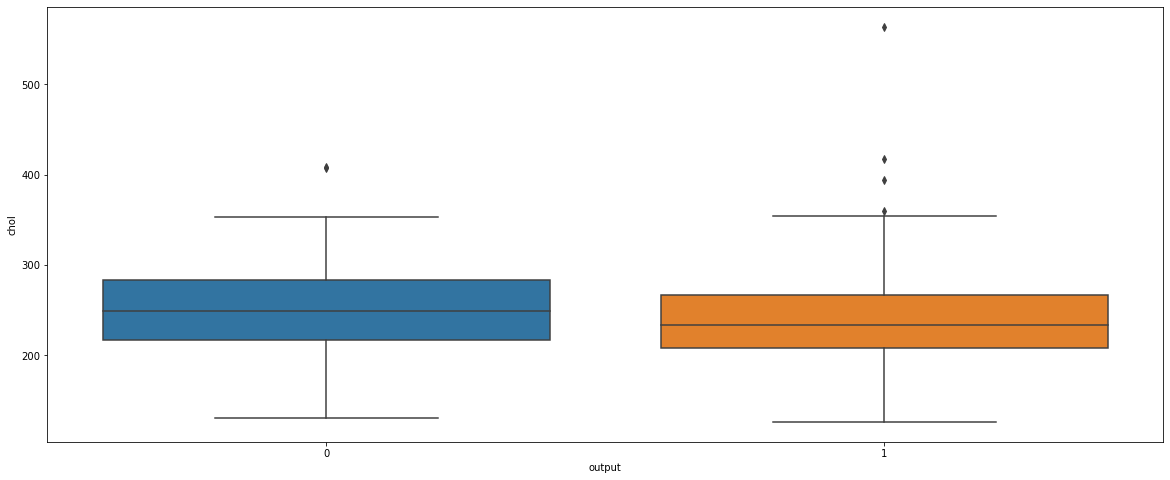

In [36]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(y="chol",x="output",data=df)
plt.show()

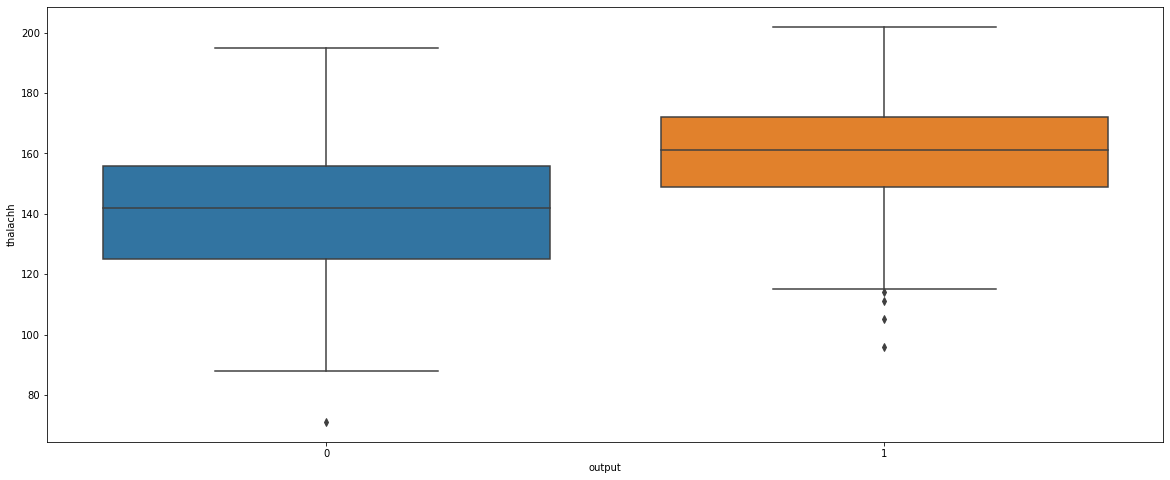

In [37]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(y="thalachh",x="output",data=df)
plt.show()

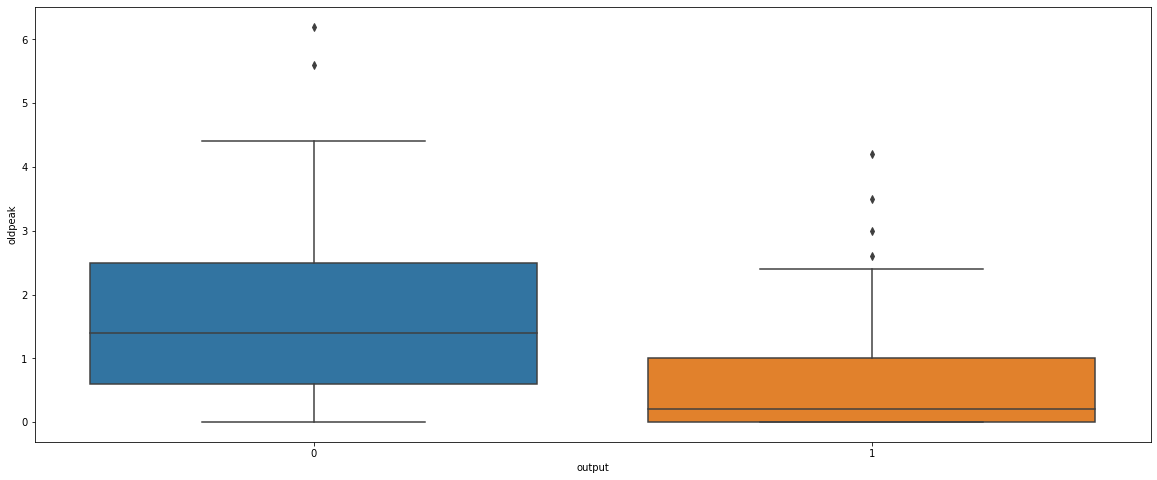

In [38]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(y="oldpeak",x="output",data=df)
plt.show()

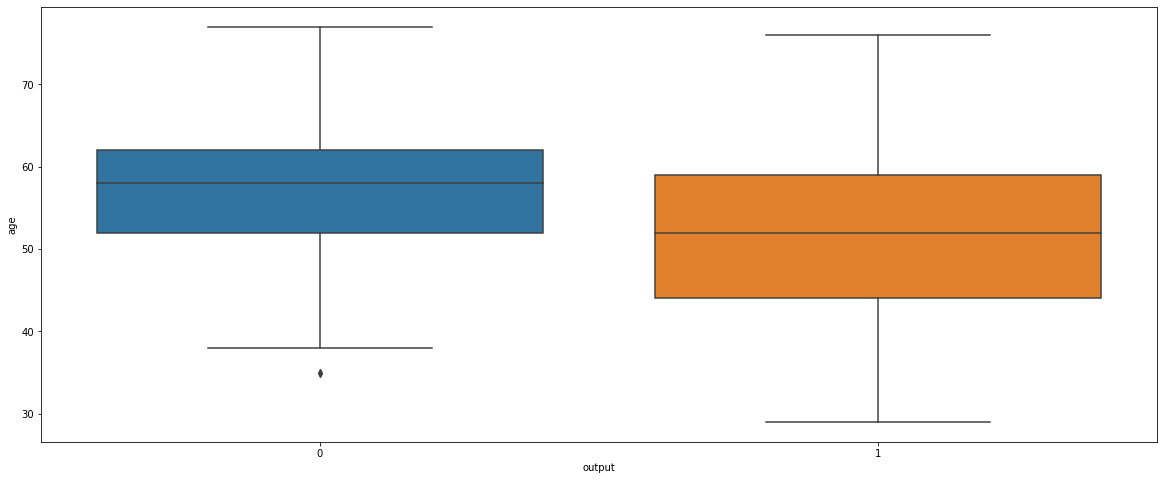

In [39]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(y="age",x="output",data=df)
plt.show()

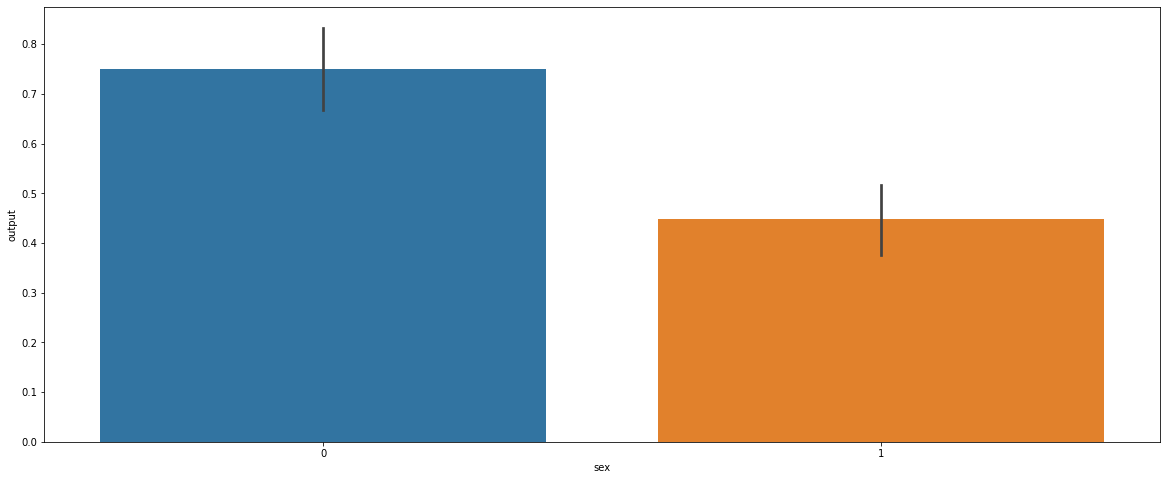

In [40]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="sex",y="output",data=df)
plt.show()

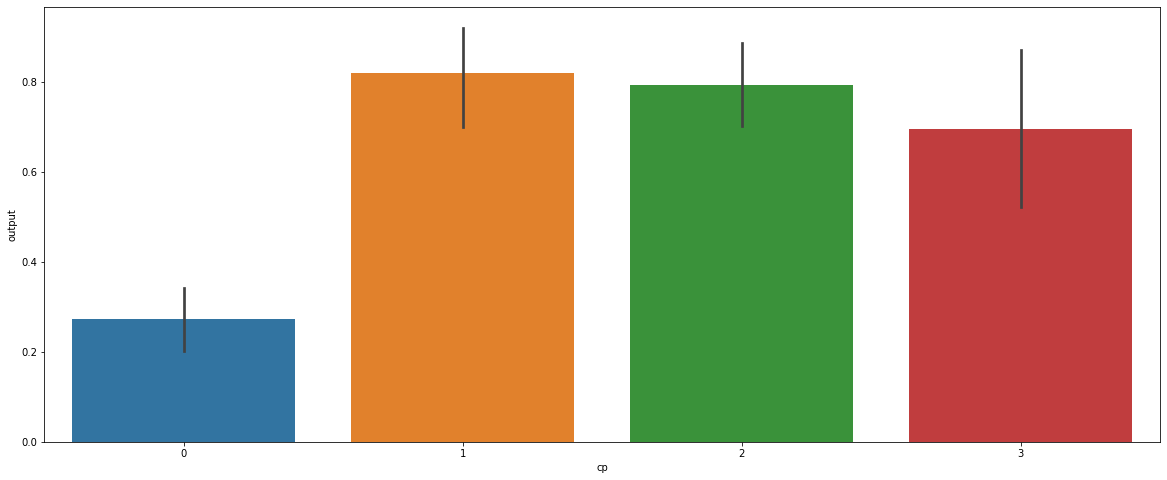

In [41]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="cp",y="output",data=df)
plt.show()

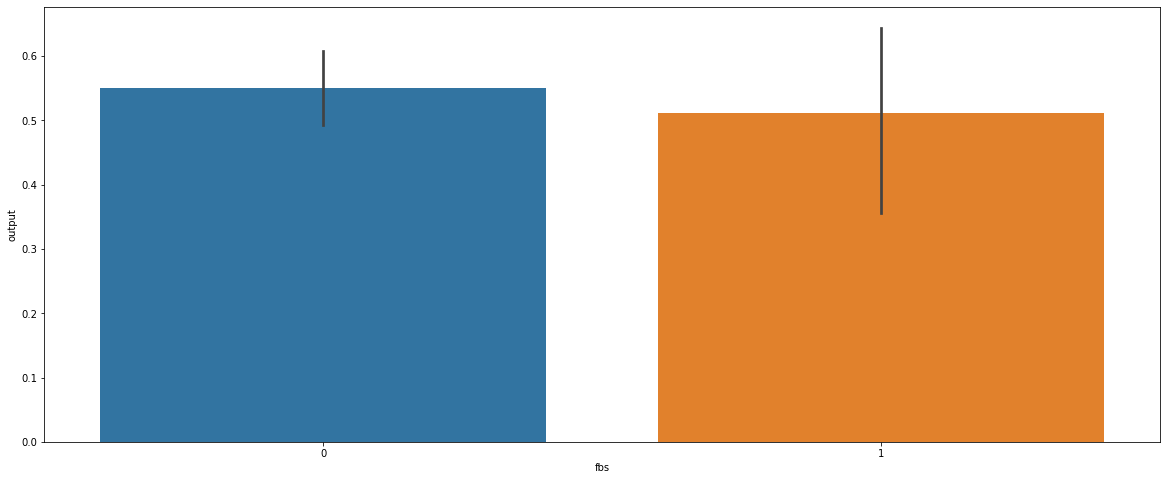

In [42]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="fbs",y="output",data=df)
plt.show()

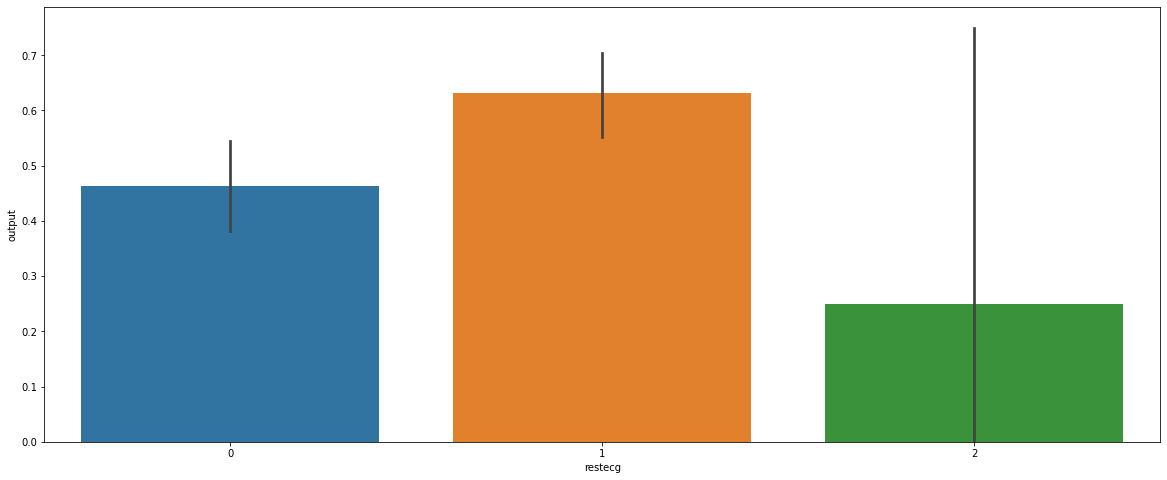

In [43]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="restecg",y="output",data=df)
plt.show()

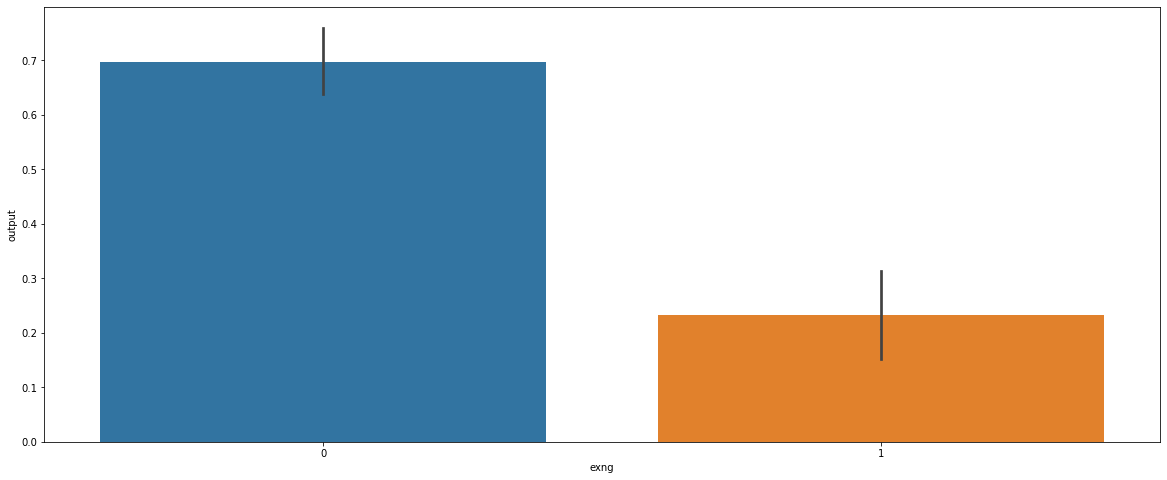

In [44]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="exng",y="output",data=df)
plt.show()

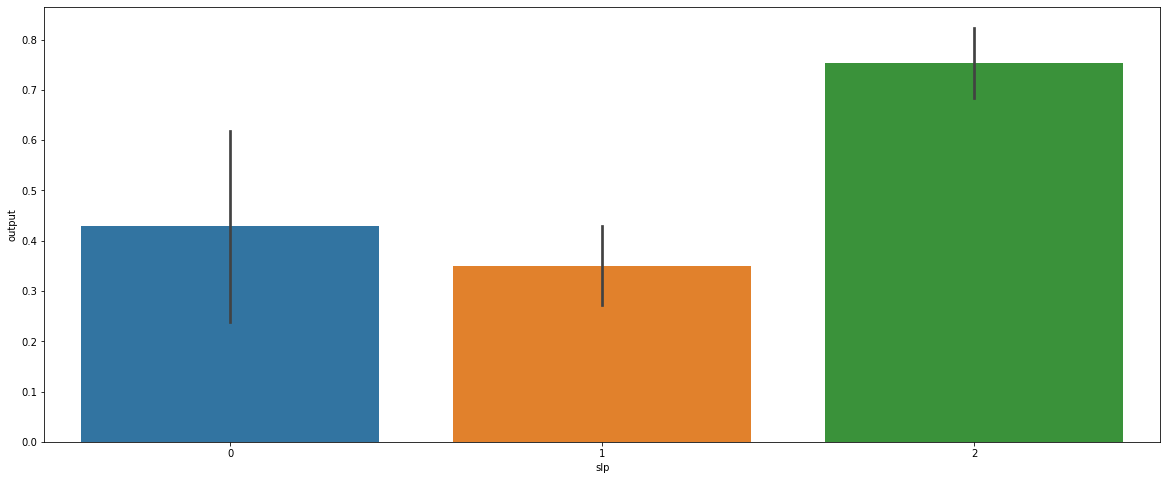

In [45]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="slp",y="output",data=df)
plt.show()

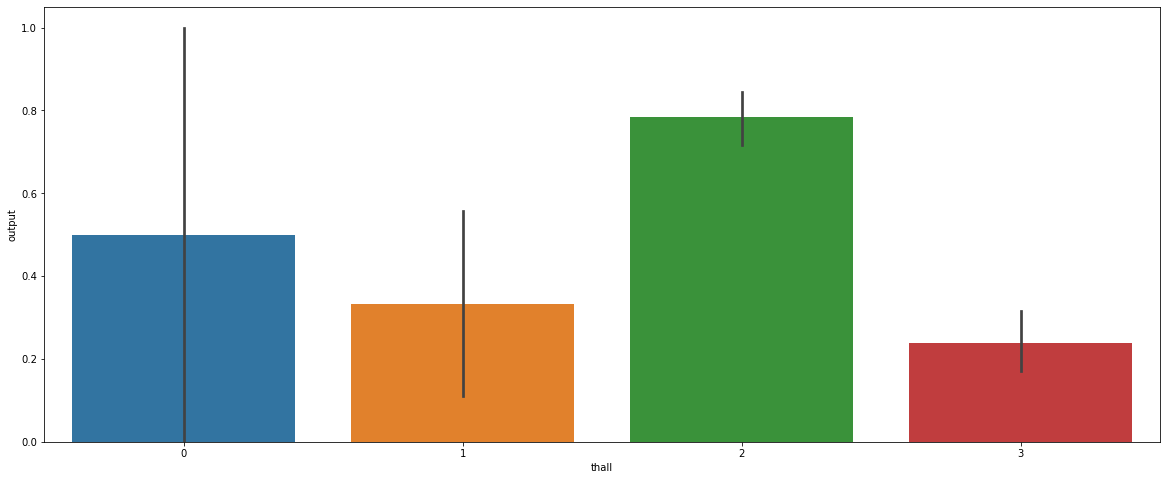

In [46]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="thall",y="output",data=df)
plt.show()

LINE

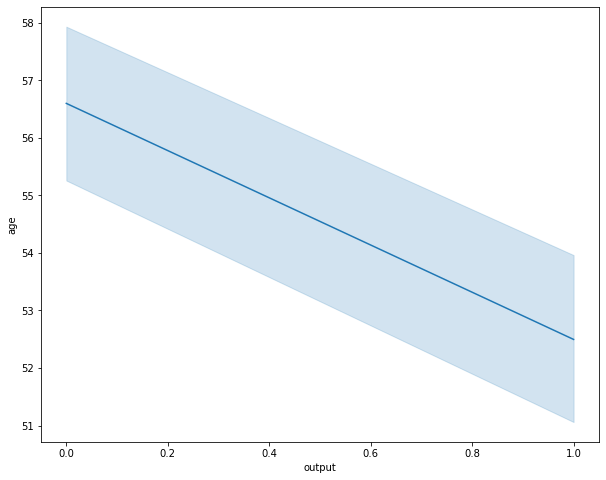

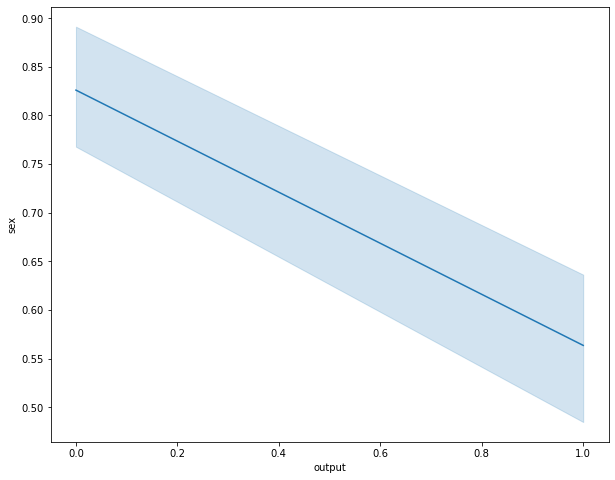

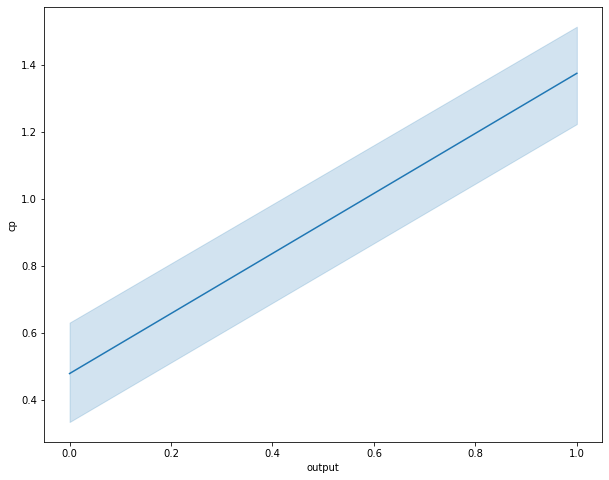

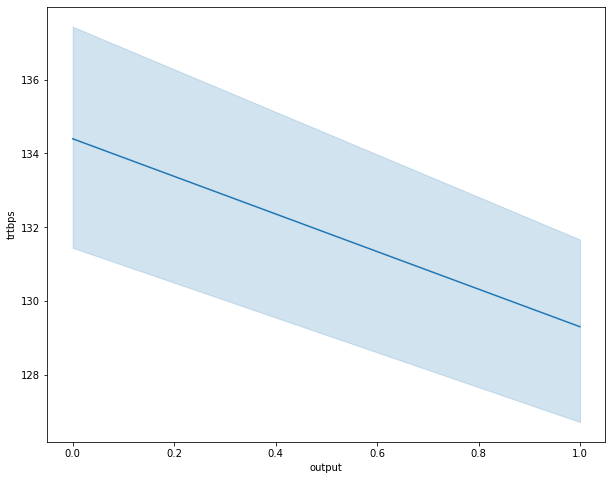

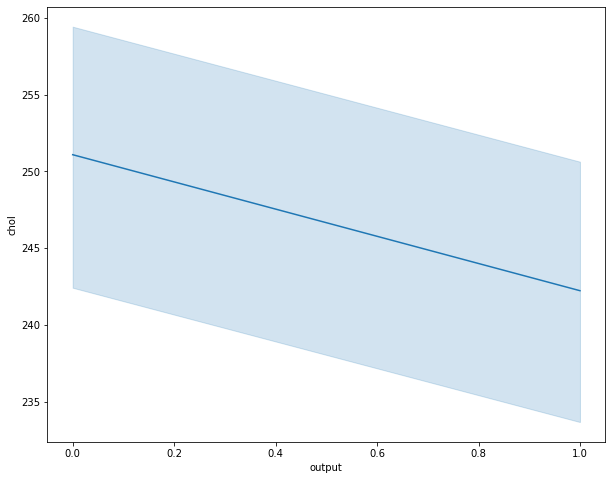

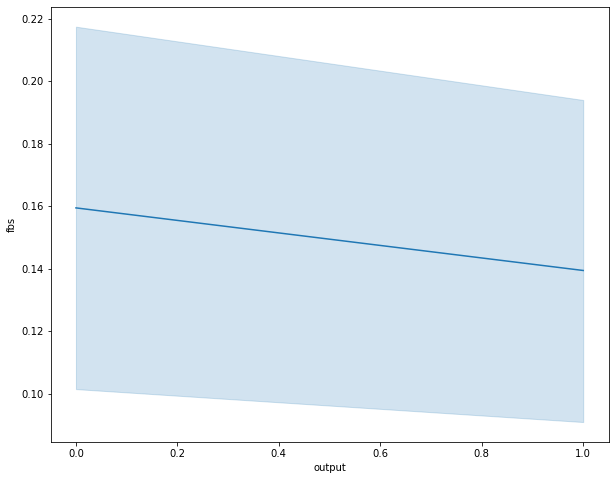

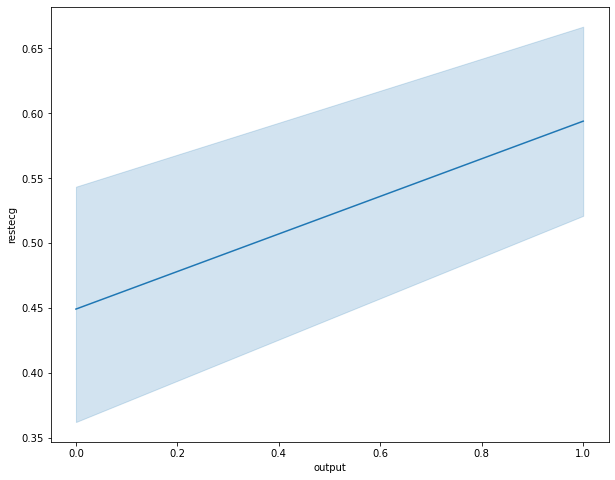

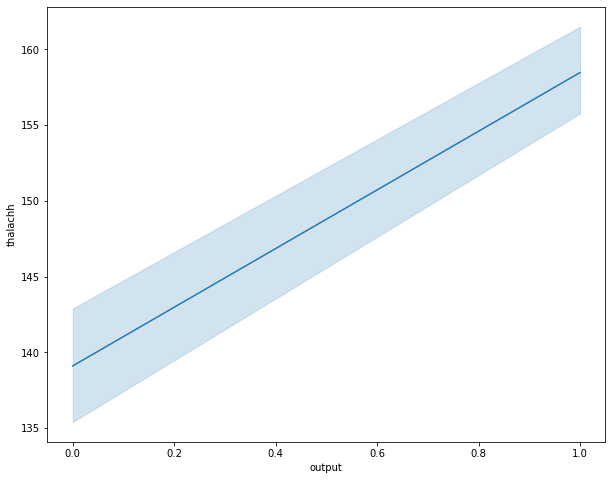

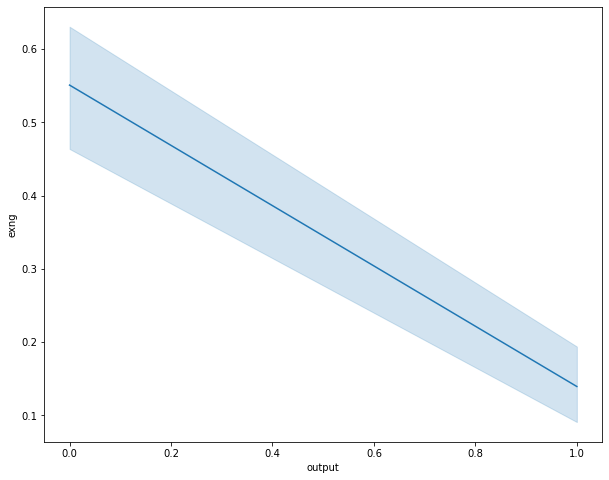

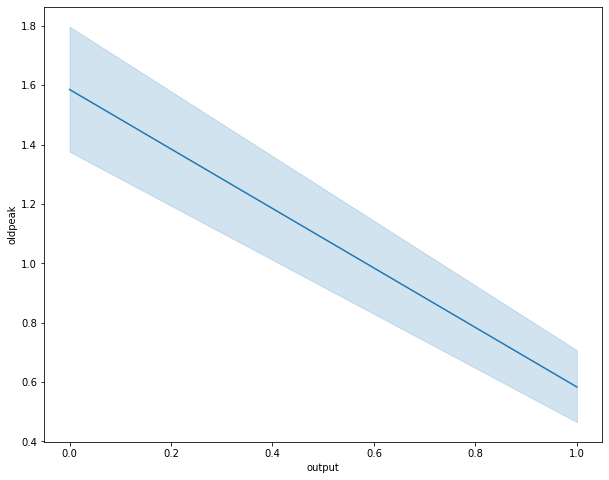

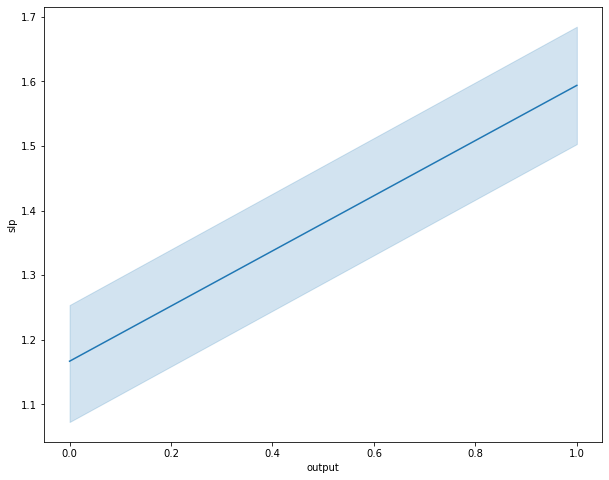

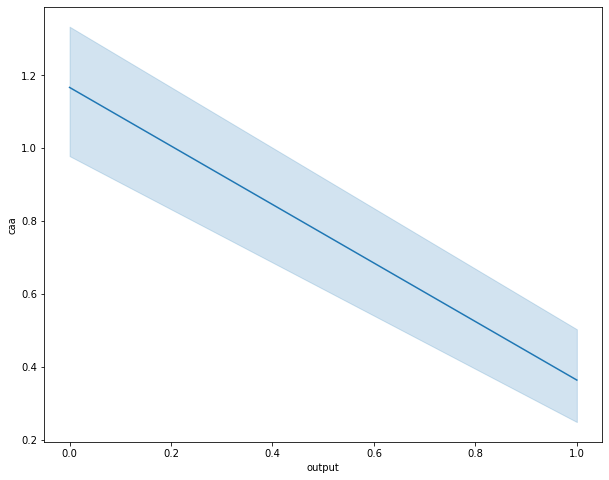

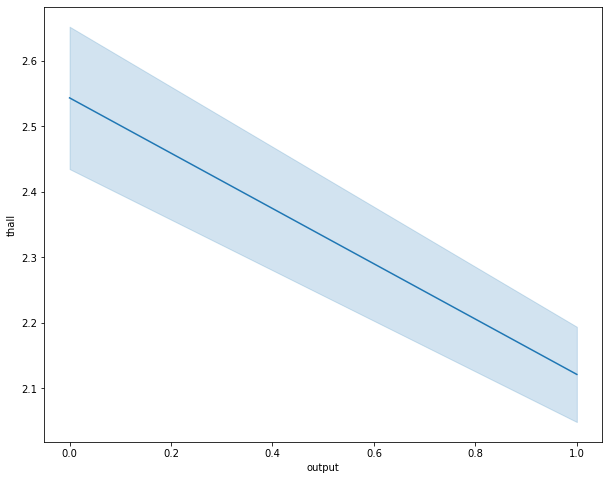

In [99]:
rand = 0
for i in df.columns:
    rand = rand + 1
    if rand < 14: # total 14 columns but we don't need output columns
        figure = plt.figure(figsize=(10,8))
        sns.lineplot(x="output",y=i,data=df)
        plt.show()
    else:
        break

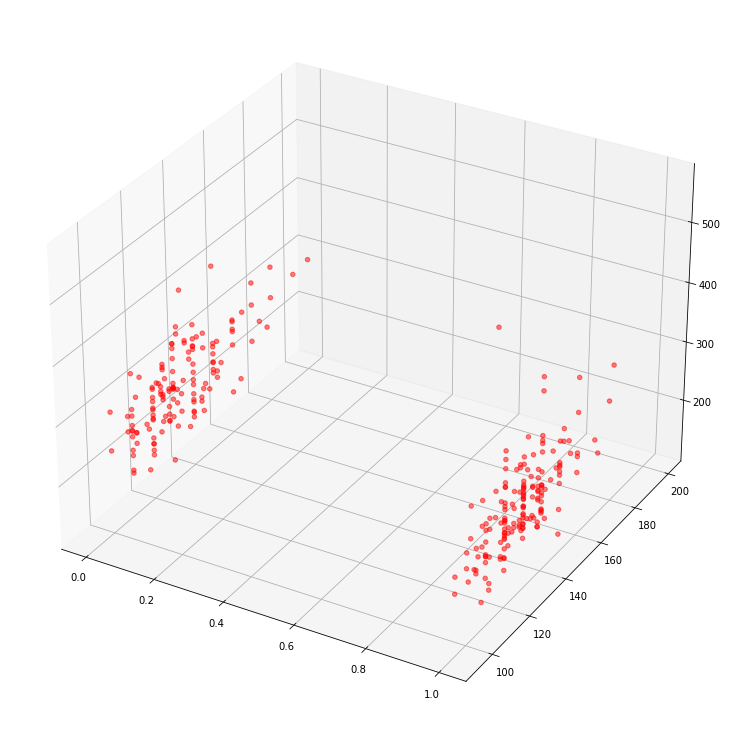

In [48]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(df["output"], df["trtbps"], df["chol"], c="red", s=20, alpha=0.5)
plt.show()

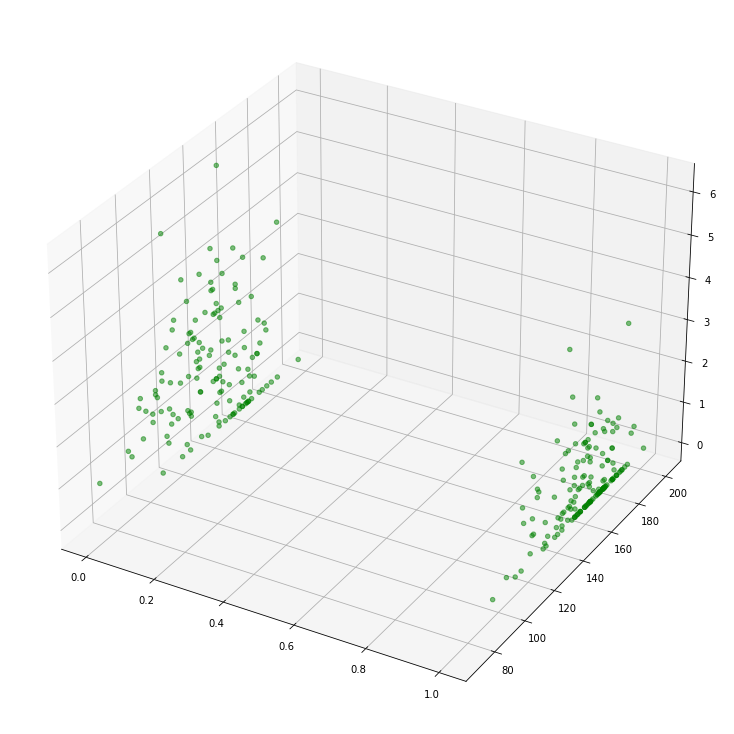

In [49]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.scatter(df["output"], df["thalachh"], df["oldpeak"], c="green", s=20, alpha=0.5);
plt.show()

In [50]:
x = df.drop("output",axis=1)
x

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2  
2      0      2  
3      0      2  
4      0      2  
..   ...    ...  
298    0      3  
299    0      3  
300    2      3  
301    1      3  
302    1      2  

[303 rows x 13 columns]

In [51]:
y = df["output"]

In [52]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [53]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.20,random_state=42)

# REGRESSION MODELS

In [54]:
lm = LinearRegression().fit(xTrain,yTrain)

In [55]:
pls = PLSRegression().fit(xTrain,yTrain)

In [56]:
ridge = Ridge().fit(xTrain,yTrain)

In [57]:
lasso = Lasso().fit(xTrain,yTrain)

In [58]:
elasticnet = ElasticNet().fit(xTrain,yTrain)

In [59]:
knnr = KNeighborsRegressor().fit(xTrain,yTrain)

In [60]:
cartr = DecisionTreeRegressor(random_state=42).fit(xTrain,yTrain)

In [61]:
baggr = BaggingRegressor(random_state=42,bootstrap_features=True,verbose=False).fit(xTrain,yTrain)

In [62]:
rfr = RandomForestRegressor(random_state=42,verbose=False).fit(xTrain,yTrain)

In [63]:
gbmr = GradientBoostingRegressor(verbose=False).fit(xTrain,yTrain)

In [64]:
xgbr = XGBRegressor().fit(xTrain,yTrain)

In [65]:
lgbmr = LGBMRegressor().fit(xTrain,yTrain)

In [66]:
catbr = CatBoostRegressor(verbose=False).fit(xTrain,yTrain)

# COMPARISON

In [67]:
models = [lm,pls,ridge,lasso,elasticnet,knnr,
         cartr,baggr,rfr,gbmr,xgbr,lgbmr,catbr]

In [68]:
models

[LinearRegression(),
 PLSRegression(),
 Ridge(),
 Lasso(),
 ElasticNet(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(random_state=42),
 BaggingRegressor(bootstrap_features=True, random_state=42, verbose=False),
 RandomForestRegressor(random_state=42, verbose=False),
 GradientBoostingRegressor(verbose=False),
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None),
 LGBMRegressor(),

In [69]:
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,scoring="r2").mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
    print(name + ": ")
    print("-" * 30)
    print(R2CV)
    print(np.sqrt(error))
    print("-" * 30)

LinearRegression: 
------------------------------
0.1175885693299598
0.443558965377771
------------------------------
PLSRegression: 
------------------------------
0.24170320065214868
0.4091370061456113
------------------------------
Ridge: 
------------------------------
0.15442450080792533
0.4318349255797763
------------------------------
Lasso: 
------------------------------
0.05634467468647888
0.4438954944607518
------------------------------
ElasticNet: 
------------------------------
0.04892104693496433
0.44387042628516743
------------------------------
KNeighborsRegressor: 
------------------------------
-0.07906666666666672
0.4853079532871984
------------------------------
DecisionTreeRegressor: 
------------------------------
-0.3533333333333333
0.5584843434732633
------------------------------
BaggingRegressor: 
------------------------------
0.23904583333333335
0.3928452379148574
------------------------------
RandomForestRegressor: 
------------------------------
0.194648

In [70]:
r = pd.DataFrame(columns=["MODELS","R2CV"])

In [71]:
r

Empty DataFrame
Columns: [MODELS, R2CV]
Index: []

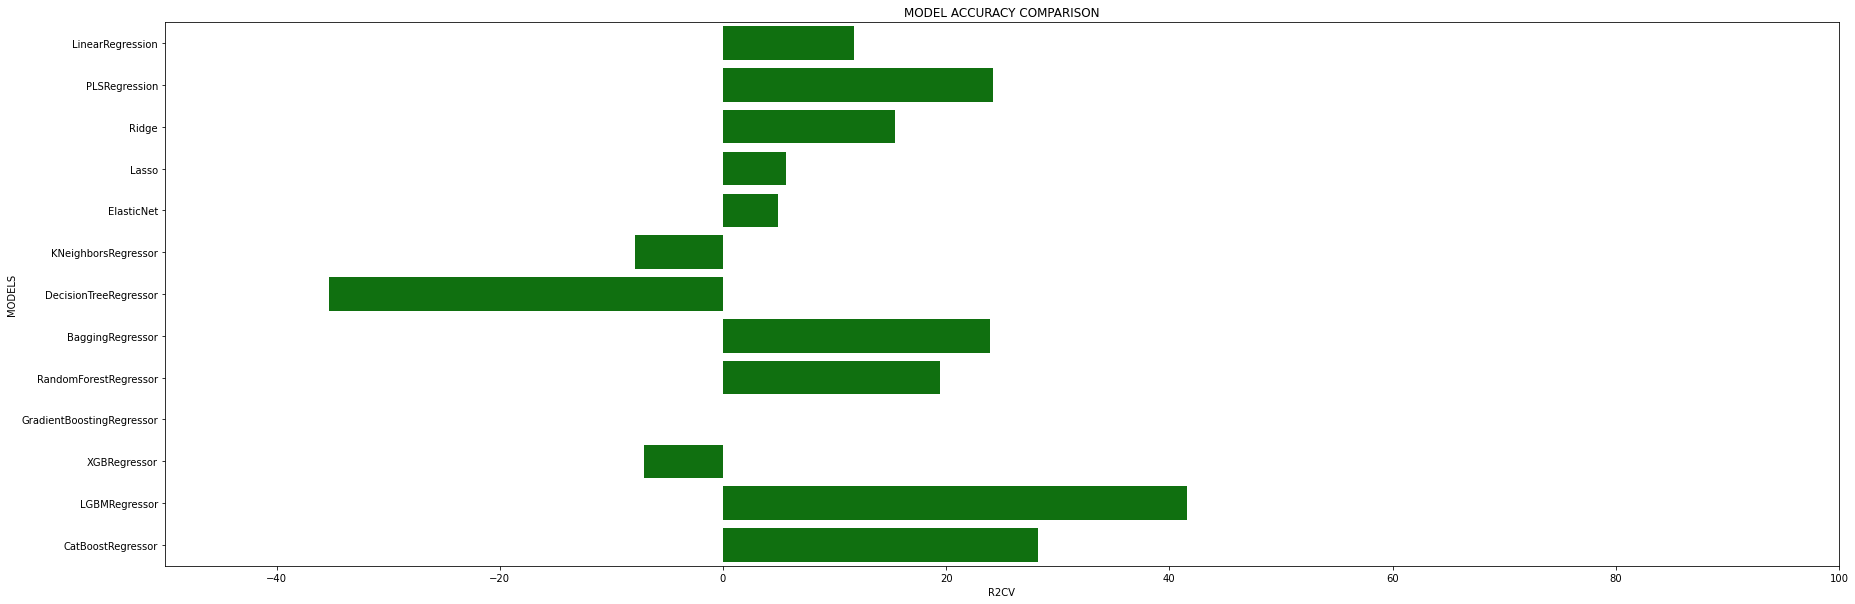

In [72]:
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,scoring="r2").mean()
    result = pd.DataFrame([[name,R2CV * 100]],columns=["MODELS","R2CV"])
    r = r.append(result)
figure = plt.figure(figsize=(30,10))
sns.barplot(x="R2CV",y="MODELS",data=r,color="g")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(-50,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

# SPECIAL REGRESSION MODELS

# OLS

In [73]:
ols = sm.OLS(yTrain,xTrain).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                 output   R-squared (uncentered):                   0.771
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              59.41
Date:                Tue, 06 Jul 2021   Prob (F-statistic):                    8.96e-66
Time:                        22:50:27   Log-Likelihood:                         -92.436
No. Observations:                 242   AIC:                                      210.9
Df Residuals:                     229   BIC:                                      256.2
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# PCR : Principal Component Analysis

In [74]:
pca = PCA()
xRTrain = pca.fit_transform(scale(xTrain))
xRTest = pca.fit_transform(scale(xTest))

# In Depth: Linear Regression

In [75]:
lmP = LinearRegression().fit(xRTrain,yTrain)
R2CV = cross_val_score(lmP,xRTest,yTest,cv=10,scoring="r2").mean()
error = -cross_val_score(lmP,xRTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()

print(R2CV)
print("----"*10)
print(np.sqrt(error))

0.11758856932996467
----------------------------------------
0.44355896537776984


# ANN:Artificial neural network

In [76]:
scaler = StandardScaler().fit(xTrain,yTrain)
xRTrain = scaler.transform(xTrain)
xRTest = scaler.transform(xTest)

In [77]:
mlpr = MLPRegressor().fit(xTrain,yTrain)
R2CV = cross_val_score(mlpr,xRTest,yTest,cv=10,scoring="r2").mean()
error = -cross_val_score(mlpr,xRTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(R2CV)
print("----"*30)
print(np.sqrt(error))

0.10049278204844558
------------------------------------------------------------------------------------------------------------------------
0.4552081491651527


# CLASSIFICATION MODELS

In [78]:
lj = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)

In [79]:
gnb = GaussianNB().fit(xTrain,yTrain)

In [80]:
knnc = KNeighborsClassifier().fit(xTrain,yTrain)

In [81]:
cartc = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)

In [82]:
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(xTrain,yTrain)

In [83]:
gbmc = GradientBoostingClassifier(verbose=False).fit(xTrain,yTrain)

In [109]:
xgbc = XGBClassifier().fit(xTrain,yTrain,eval_metric = "logloss")

XGBoostError: [23:36:39] C:\Users\Administrator\workspace\xgboost-win64_release_1.4.0\src\objective\objective.cc:26: Unknown objective function: `error`
Objective candidate: survival:aft
Objective candidate: binary:hinge
Objective candidate: multi:softmax
Objective candidate: multi:softprob
Objective candidate: rank:pairwise
Objective candidate: rank:ndcg
Objective candidate: rank:map
Objective candidate: count:poisson
Objective candidate: survival:cox
Objective candidate: reg:gamma
Objective candidate: reg:tweedie
Objective candidate: reg:squarederror
Objective candidate: reg:squaredlogerror
Objective candidate: reg:logistic
Objective candidate: reg:pseudohubererror
Objective candidate: binary:logistic
Objective candidate: binary:logitraw
Objective candidate: reg:linear


In [86]:
lgbmc = LGBMClassifier().fit(xTrain,yTrain)

In [87]:
catbc = CatBoostClassifier(verbose=False).fit(xTrain,yTrain)

# COMPARISON

In [107]:
modelsc = [lj,gnb,knnc,cartc,rfc,gbmc,xgbc,lgbmc,catbc]

In [108]:
for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    print(name + ": ")
    print("-" * 30)
    print(accuracy_score(yTest,predict))
    print(R2CV)
    print(np.sqrt(error))
    print("-" * 30)

LogisticRegression: 
------------------------------
0.8688524590163934
0.8357142857142857
0.4053217416888888
------------------------------
GaussianNB: 
------------------------------
0.8688524590163934
0.8523809523809524
0.3842122429322725
------------------------------
KNeighborsClassifier: 
------------------------------
0.6885245901639344
0.6071428571428571
0.6267831705280088
------------------------------
DecisionTreeClassifier: 
------------------------------
0.7540983606557377
0.738095238095238
0.511766315719159
------------------------------
RandomForestClassifier: 
------------------------------
0.8360655737704918
0.819047619047619
0.42538497969766276
------------------------------
GradientBoostingClassifier: 
------------------------------
0.7704918032786885
0.719047619047619
0.5300494136893097
------------------------------
[23:35:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation m

[22:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

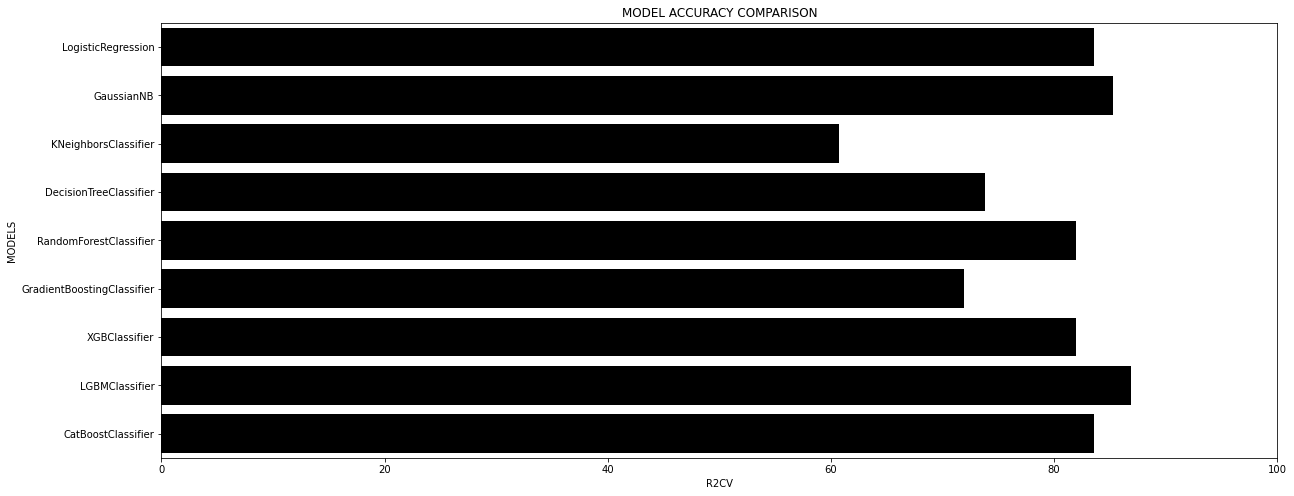

In [90]:
r = pd.DataFrame(columns=["MODELS","R2CV"])
for model in modelsc:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    result = pd.DataFrame([[name,R2CV*100]],columns=["MODELS","R2CV"])
    r = r.append(result)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="R2CV",y="MODELS",data=r,color="k")
plt.xlabel("R2CV")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

# ANN C MODELS & ERROR & TUNING & PREDICT

In [91]:
scaler = StandardScaler().fit(xTrain, yTrain)
xRTrain = scaler.transform(xTrain)
xRTest = scaler.transform(xTest)

In [92]:
mlpc = MLPClassifier().fit(xRTrain,yTrain)
predict = mlpc.predict(xRTest)

R2CV = cross_val_score(mlpc,xRTest,yTest,cv=10).mean()
print(R2CV)
error = mean_squared_error(yTest,predict)
print(np.sqrt(error))

0.819047619047619
0.3841106397986879


# TUNING FOR BEST MODEL

In [93]:
params = {"n_estimators": [100, 500, 1000, 2000],
          "subsample": [0.6, 0.8, 1.0],
          "max_depth": [3, 4, 5, 6],
          "learning_rate": [0.1, 0.01, 0.02, 0.05],
          "min_child_samples": [5, 10, 20]}

In [94]:
cv = GridSearchCV(lgbmc,params,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)
print(cv.best_score_)

{'learning_rate': 0.01, 'max_depth': 5, 'min_child_samples': 10, 'n_estimators': 100, 'subsample': 0.6}
0.8223333333333332


# FINAL MODEL

In [95]:
lgbmctuned = LGBMClassifier(learning_rate=0.01,max_depth=5,min_child_samples=10,
                           n_estimators=100,subsample=0.6).fit(xTrain,yTrain)

R2CVtuned = cross_val_score(lgbmctuned,xTest,yTest,cv=10).mean()
print(R2CVtuned)
errortuned = -cross_val_score(lgbmctuned,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
print(np.sqrt(errortuned))

0.8523809523809524
0.3842122429322725


BEST SCORE IS STILL GaussianNB -- > 0.8688524590163934